Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PatientID      20 non-null     int64  
 1   Age            20 non-null     int64  
 2   BloodPressure  20 non-null     int64  
 3   SugarLevel     20 non-null     float64
 4   Weight         20 non-null     float64
dtypes: float64(2), int64(3)
memory usage: 932.0 bytes
None

Initial Data Head:
   PatientID  Age  BloodPressure  SugarLevel      Weight
0          1   44            118   87.892495  105.568034
1          2   39            109  177.321803  105.703426
2          3   49            149  144.148273   77.787070
3          4   58            121   90.355404  115.244784
4          5   35            109  126.421800   70.383790

Missing Values Count:
PatientID        0
Age              0
BloodPressure    0
SugarLevel       0
Weight           0
dtype: int64

Duplicate Rows Co

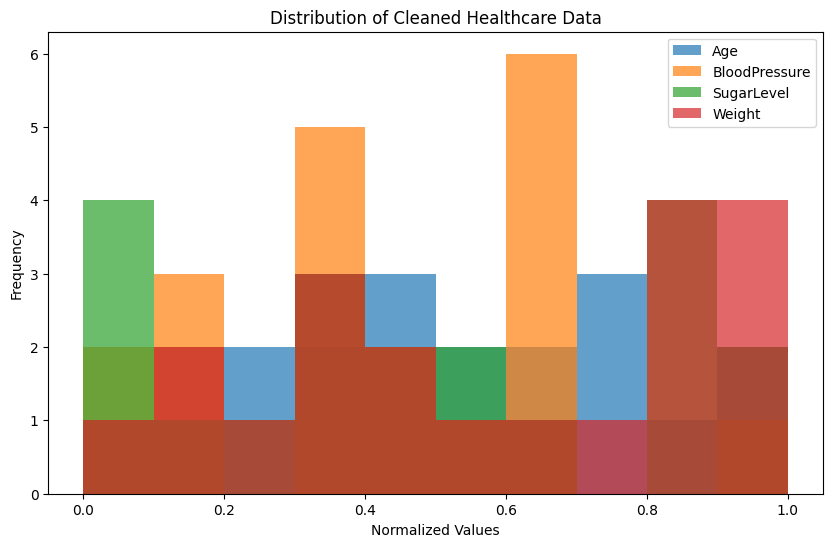

In [7]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Create the DataFrame from the provided data
data = pd.DataFrame({
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'Age': [44, 39, 49, 58, 35, 25, 46, 28, 60, 55, 41, 48, 58, 35, 67, 70, 43, 74, 19, 56],
    'BloodPressure': [118, 109, 149, 121, 109, 129, 132, 93, 145, 125, 143, 141, 93, 145, 176, 109, 148, 122, 147, 119],
    'SugarLevel': [87.89249492, 177.321803, 144.1482732, 90.35540377, 126.4218, 95.27311377, 146.6077185, 109.7549862, 103.1938308, 197.7263558,
                   180.5787961, 181.9725071, 181.7836075, 133.3857117, 87.00502726, 193.2727707, 135.9394821, 129.4112337, 125.4839575, 160.715853],
    'Weight': [105.5680341, 105.7034256, 77.78706964, 115.2447839, 70.38379045, 119.0503564, 62.17751536, 81.79225909, 94.63736848, 118.5939808,
               103.5846551, 61.45498223, 50.68483484, 113.1866322, 84.93857601, 77.71503786, 106.5759888, 83.30042553, 74.08193839, 111.8656975]
})

# Display basic information about the dataset
print("Initial Data Info:")
print(data.info())
print("\nInitial Data Head:")
print(data.head())

# 1. Handling Missing Values (if any)
# Check for missing values in each column
print("\nMissing Values Count:")
print(data.isnull().sum())

# In this case, there are no missing values, but if there were:
# For numerical columns, we would use the median to fill missing values
# data['BloodPressure'].fillna(data['BloodPressure'].median(), inplace=True)

# For categorical columns, we could use the mode (not needed here)

# 2. Handle Duplicates
# Check for duplicates in the dataset
print("\nDuplicate Rows Count:")
print(data.duplicated().sum())

# Drop duplicates if any
data.drop_duplicates(inplace=True)

# 3. Normalize Numerical Data (Min-Max Scaling)
# Normalize the 'Age', 'BloodPressure', 'SugarLevel', and 'Weight' columns using Min-Max Scaling
scaler = MinMaxScaler()

# Apply scaling to numerical columns
numerical_columns = ['Age', 'BloodPressure', 'SugarLevel', 'Weight']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# 4. Display Cleaned Data Info and First Few Rows
print("\nCleaned Data Info:")
print(data.info())
print("\nCleaned Data Head:")
print(data.head())

# Save the cleaned data to a new CSV file
data.to_csv('cleaned_healthcare_data.csv', index=False)

# 5. Generate Graphs to Visualize Cleaned Data
plt.figure(figsize=(10, 6))
plt.hist(data['Age'], bins=10, alpha=0.7, label='Age')
plt.hist(data['BloodPressure'], bins=10, alpha=0.7, label='BloodPressure')
plt.hist(data['SugarLevel'], bins=10, alpha=0.7, label='SugarLevel')
plt.hist(data['Weight'], bins=10, alpha=0.7, label='Weight')
plt.xlabel("Normalized Values")
plt.ylabel("Frequency")
plt.title("Distribution of Cleaned Healthcare Data")
plt.legend()
plt.show()

